# HW: First Foray

```yaml
Course:   DS 5001 Exploratory Text Analytics
Module:   01 Getting Started
Topic:    Lab: Further Exploration
Author:   R.C. Alvarado
Date:     17 October 2022 (revised)
```



## Purpose

We continue exploring the Gutenberg text, looking at simple word dispersion plots and correlations.

## Set Up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set()

In [3]:
import configparser
config = configparser.ConfigParser()

In [5]:
config.read("../../../env.ini.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

KeyError: 'data_home'

## Retrieve Work

In [6]:
K = pd.read_csv("C:\\Users\\ddj6tu\\Documents\\GitHub\\DS5001\\output\\M01-ff-TOKENS.csv")[['term_str']]
V = pd.read_csv("C:\\Users\\ddj6tu\\Documents\\GitHub\\DS5001\\output\\M01-ff-VOCAB.csv").set_index('term_str')

## Word Dispersion Plots

We create a simple dispersion plot to show the distribution of words over narrative time.


In [7]:
K.head()

,term_str
0,the
1,project
2,gutenberg
3,ebook
4,of


# Project tokens onto feature space

In [47]:
# Another (slower) way to do it
# K['n'] = 1
# K.reset_index().set_index(['index','term_str']).unstack().T.fillna(0)

In [8]:
D = pd.get_dummies(K.term_str, dtype='int')

In [9]:
D

,1,10,105,105txt,105zip,11,12,13,14,15,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
D.sum().sort_values() # Another way to create the vocabulary

joyous         1
loving         1
lowering       1
lowest         1
loyalty        1
            ... 
a           1648
of          2684
and         2851
to          2862
the         3501
Length: 6332, dtype: int64

In [11]:
D.sum(axis=1).sort_values() # Each is 1 because one-hot encoding

85497    0
83396    0
83395    0
72       0
83405    0
        ..
28766    1
28765    1
28764    1
28772    1
86306    1
Length: 86307, dtype: int64

In [12]:
D.T.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,86297,86298,86299,86300,86301,86302,86303,86304,86305,86306
latter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
reconcile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
investigated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mirrors,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
casements,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


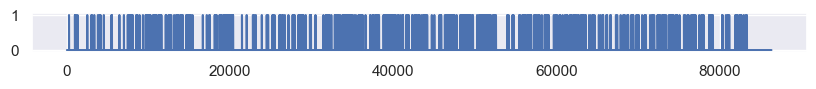

In [13]:
D['anne'].plot(figsize=(10, .5));

In [14]:
def word_plot(term_str):
    term_str = term_str.lower()
    D[term_str].plot(figsize=(10, .5), legend=False, title=term_str.upper());

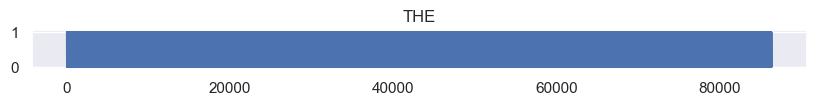

In [15]:
word_plot('the')

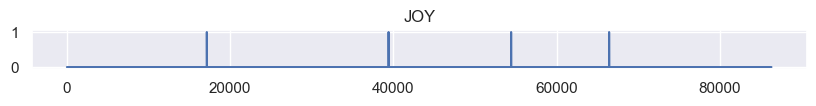

In [16]:
word_plot('joy')

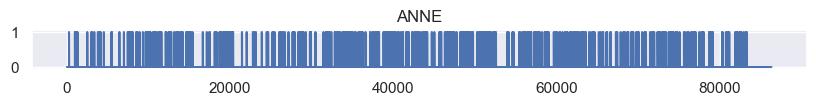

In [17]:
word_plot('anne')

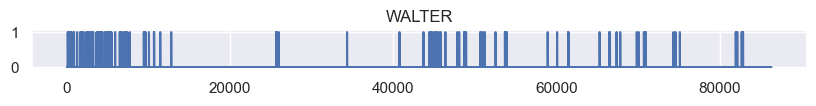

In [18]:
word_plot('walter')

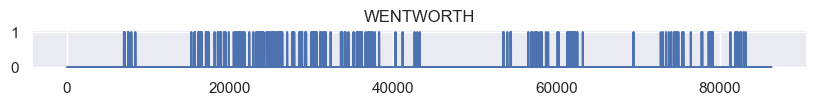

In [19]:
word_plot('wentworth')

## Correlation Graphs

We chunk narrative time into 100 segments of equal length (centiles). 

Then we count how many times each word appears in each centile.

Then we compare plots for pairs of words.

In [20]:
K['centile'] = (K.index * 100 / len(K)).astype('int') + 1

In [19]:
# K.centile.value_counts().value_counts() # View chunk sizes

In [21]:
M = [None, None]
M[0] = K.groupby(['centile','term_str']).term_str.count().unstack(fill_value=0)
M[1] = M[0] / M[0].sum()

In [328]:
# M[1].sum(1).plot(figsize=(20,5));

In [22]:
M[1].T.sample(10)

centile,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
term_str,,,,,,,,,,,,,,,,,,,,,
trust,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.25,0.000000,0.0,0.0,0.250000,0.000000,0.0,0.000000,0.0,0.000000
course,0.0,0.0,0.0,0.0,0.023256,0.000000,0.023256,0.023256,0.0,0.0,...,0.00,0.023256,0.0,0.0,0.000000,0.000000,0.0,0.023256,0.0,0.000000
grounds,0.0,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
mediterranean,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
carry,0.0,0.0,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.166667,0.166667,0.0,0.000000,0.0,0.166667
grandfather,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
labourers,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
strangers,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
trafalgar,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000


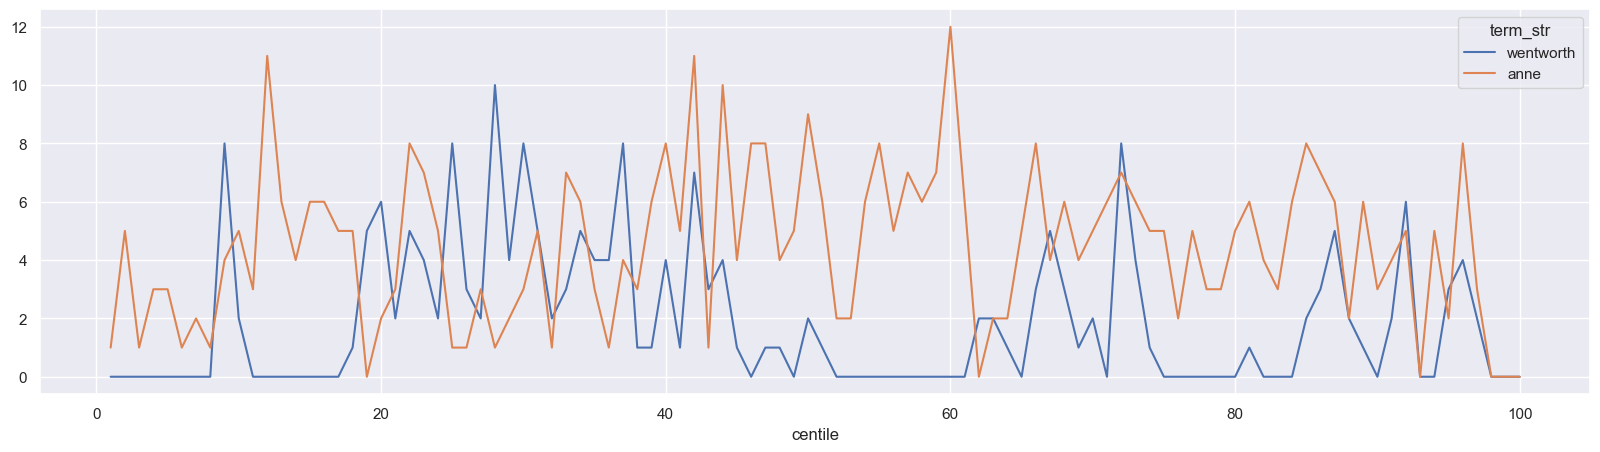

In [23]:
M[0][['wentworth','anne']].plot(figsize=(20,5), style='-');

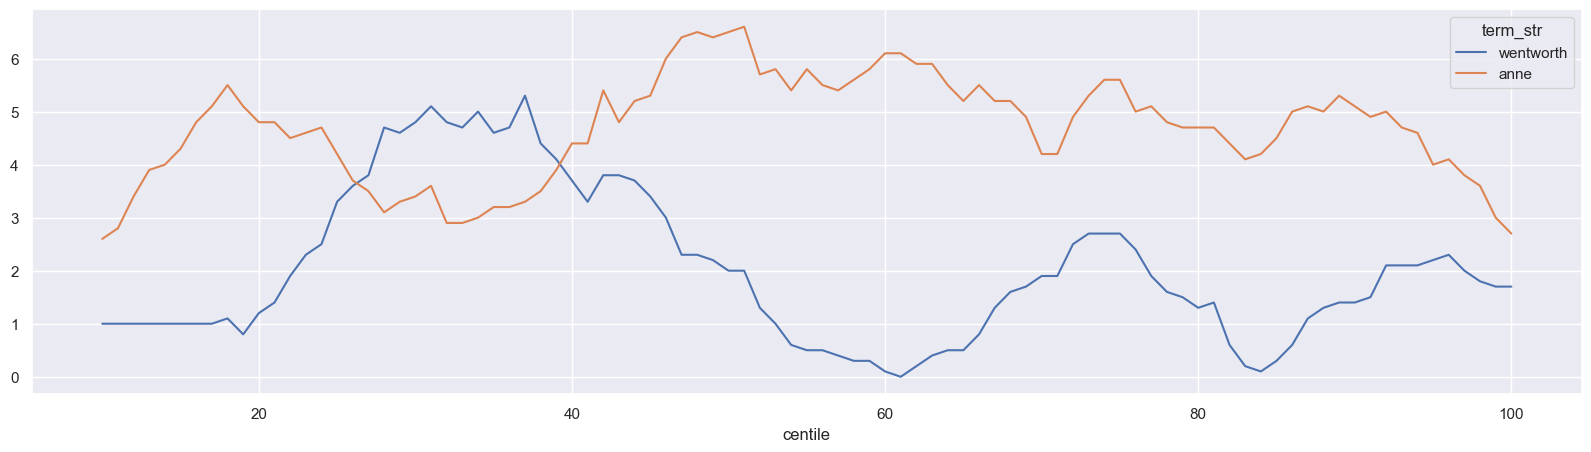

In [24]:
M[0][['wentworth','anne']].rolling(10).mean().plot(figsize=(20,5));

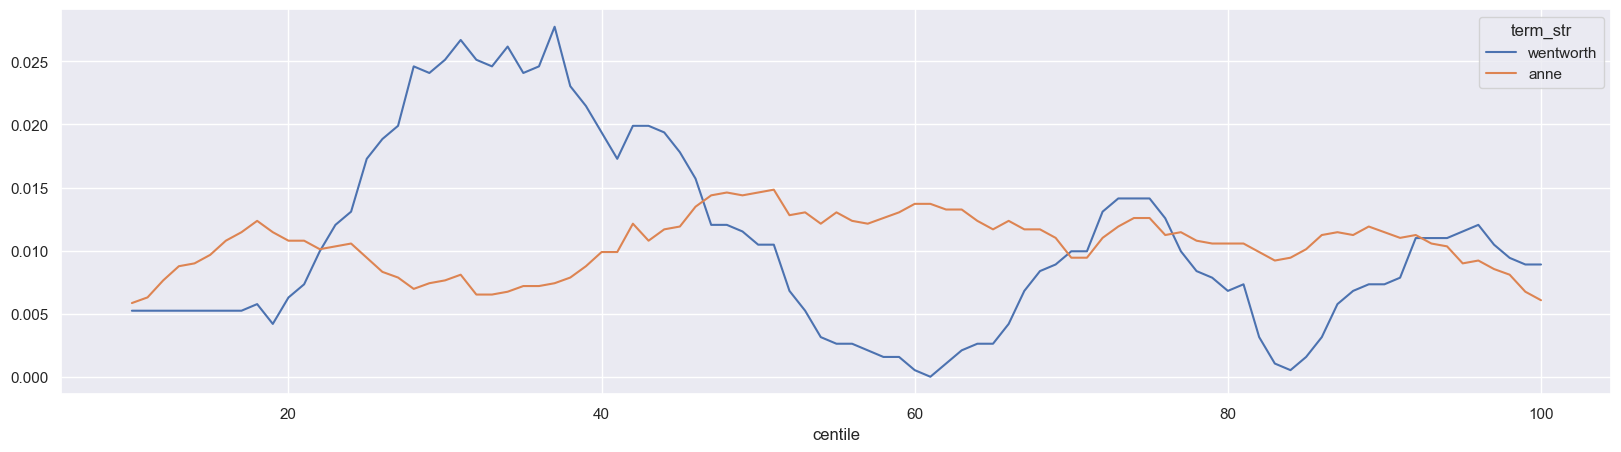

In [25]:
M[1][['wentworth','anne']].rolling(10).mean().plot(figsize=(20,5));

In [26]:
def plot_words(words, rolling=True, w=10, norm=1):
    config = {
        'figsize': (20, 5),
        'title': f"{', '.join(words).upper()} (norm={norm})"
    }
    if rolling:
        M[norm][words].rolling(w).mean().plot(**config);
    else:
        M[norm][words].plot(**config);

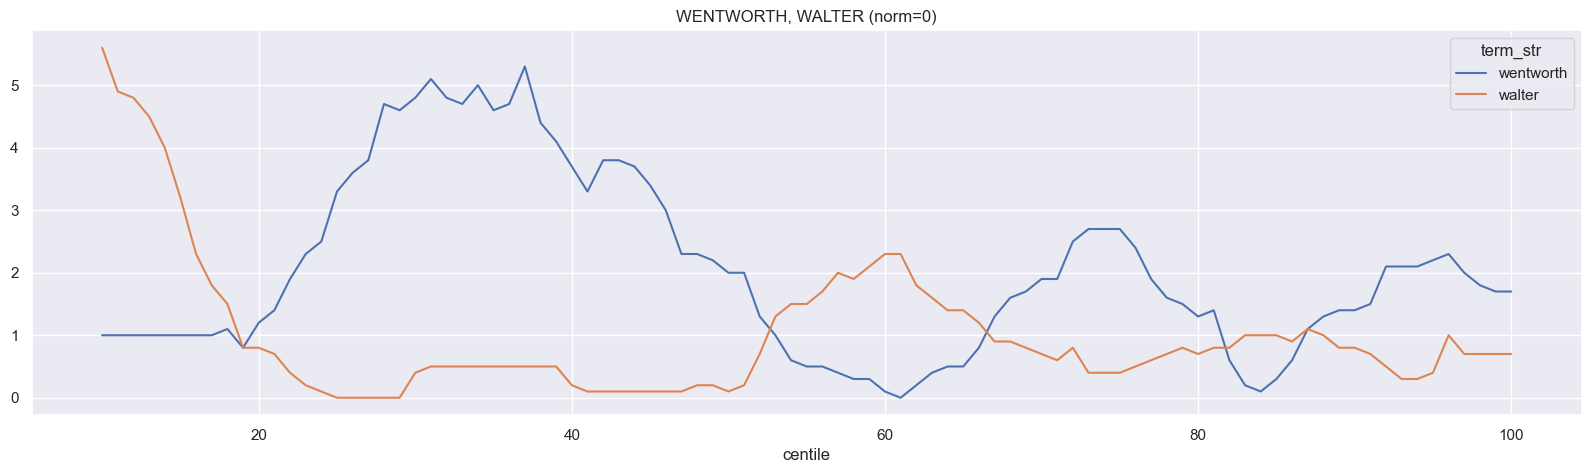

In [27]:
plot_words(['wentworth','walter'], norm=0)

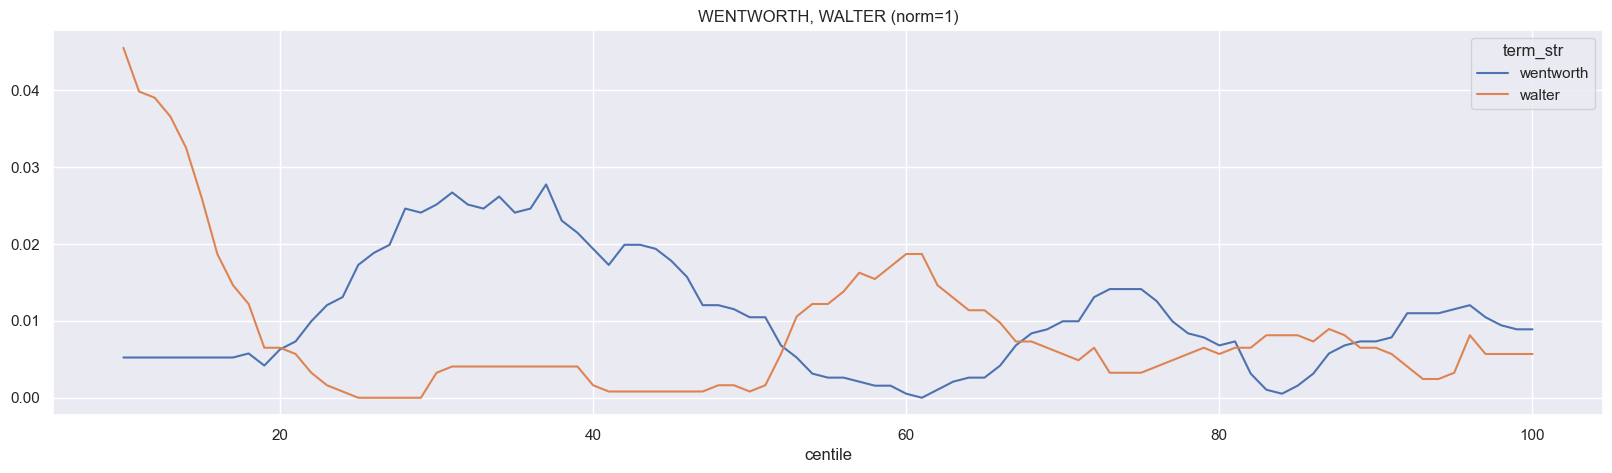

In [28]:
plot_words(['wentworth','walter'])

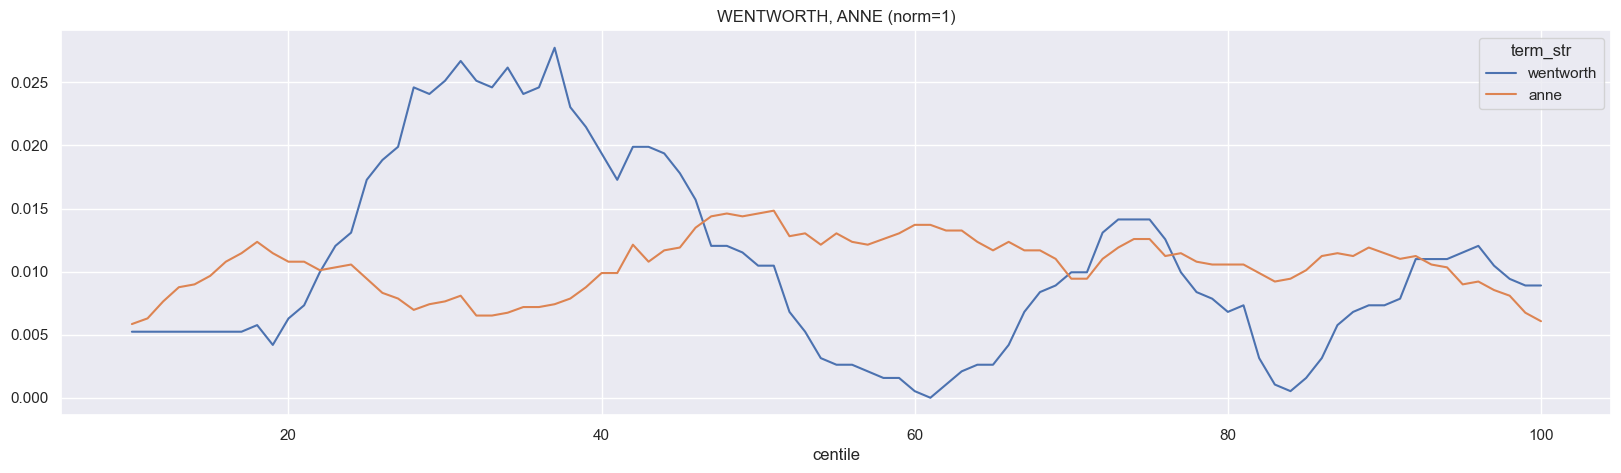

In [29]:
plot_words(['wentworth','anne'])

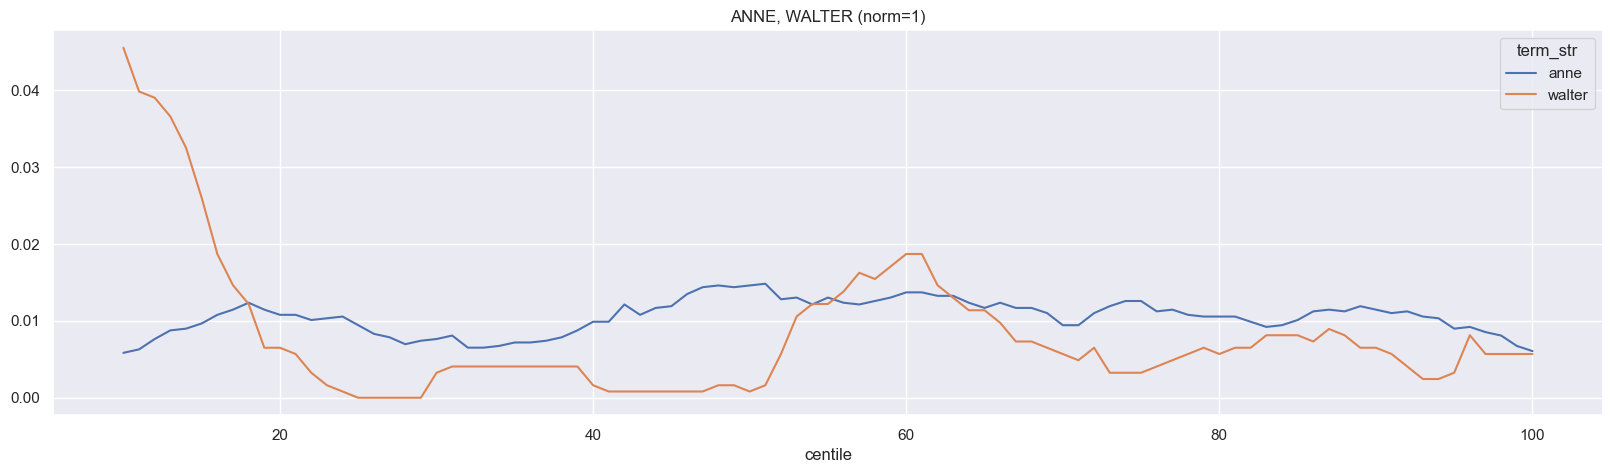

In [30]:
plot_words(['anne','walter'])

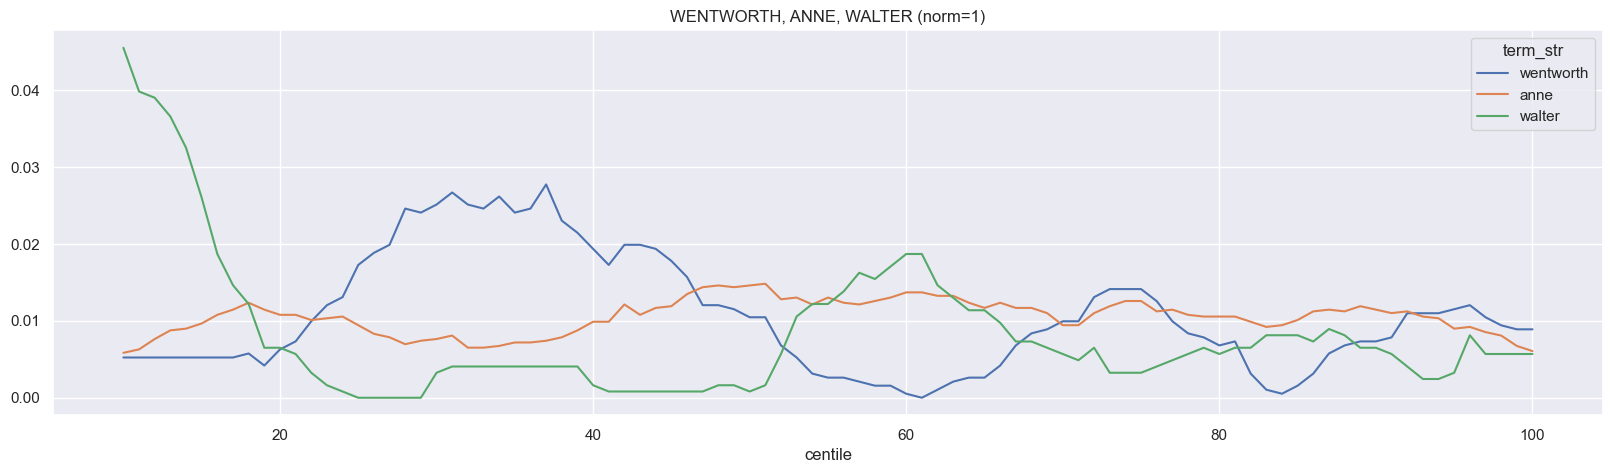

In [31]:
plot_words(['wentworth', 'anne', 'walter'])

In [34]:
q2 = lambda a, b: M[1][[a,b]].corr(method='kendall').iloc[0,1]

<Axes: title={'center': '0.14620994732078757'}, xlabel='anne', ylabel='mary'>

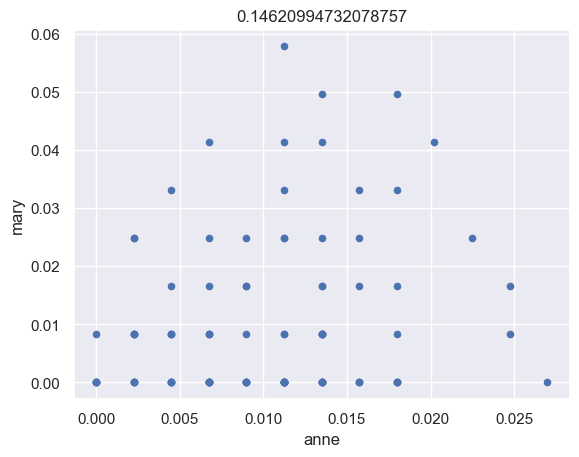

In [35]:
M[1].plot.scatter('anne','mary', title=q2('anne','mary'))

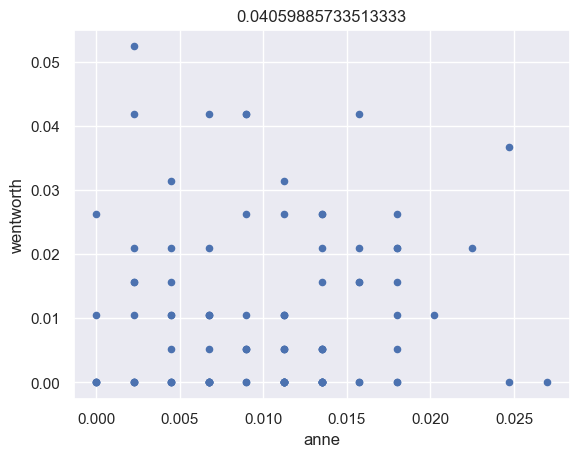

In [36]:
M[1].plot.scatter('anne','wentworth', title=q2('anne','wentworth'));

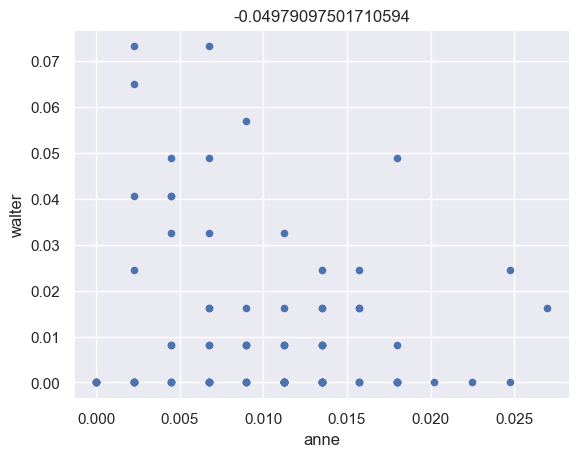

In [37]:
M[1].plot.scatter('anne','walter', title=q2('anne','walter'));

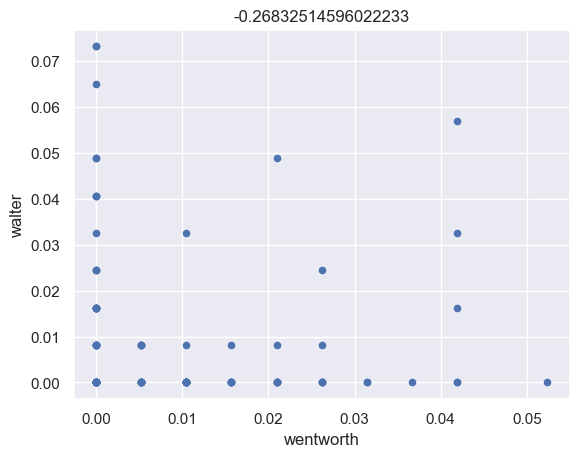

In [38]:
M[1].plot.scatter('wentworth','walter', title=q2('wentworth','walter'));

In [39]:
M[1]

term_str,1,10,105,105txt,105zip,11,12,13,14,15,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
centile,,,,,,,,,,,,,,,,,,,,,
1,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,...,0.0,0.0,0.0,0.071429,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.071429,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
97,0.2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Select Significant Words

In [40]:
V['df'] = M[0].astype('bool').sum()
V['dfidf'] = (V.df/100) * np.log2(100/V.df)

In [41]:
V.sort_values('dfidf')

,n,p,df,dfidf
term_str,,,,
the,3501,0.040564,100.0,0.000000
at,548,0.006349,100.0,0.000000
with,700,0.008111,100.0,0.000000
for,732,0.008481,100.0,0.000000
as,819,0.009489,100.0,0.000000
...,...,...,...,...
life,50,0.000579,37.0,0.530729
thing,41,0.000475,37.0,0.530729
woman,59,0.000684,37.0,0.530729


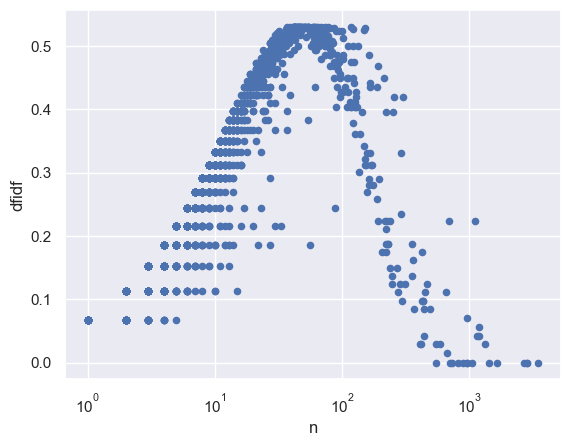

In [42]:
V.plot.scatter('n', 'dfidf', logx=True);

In [43]:
V[V.dfidf == 0]

,n,p,df,dfidf
term_str,,,,
the,3501,0.040564,100.0,0.0
to,2862,0.033161,100.0,0.0
and,2851,0.033033,100.0,0.0
of,2684,0.031098,100.0,0.0
a,1648,0.019095,100.0,0.0
in,1439,0.016673,100.0,0.0
it,1051,0.012177,100.0,0.0
be,969,0.011227,100.0,0.0
not,955,0.011065,100.0,0.0


In [44]:
V[V.dfidf > .5].head(20)

,n,p,df,dfidf
term_str,,,,
charles,152,0.001761,40.0,0.528771
sir,149,0.001726,42.0,0.525646
walter,123,0.001425,41.0,0.527385
russell,118,0.001367,39.0,0.529797
bath,101,0.001170,47.0,0.511956
louisa,100,0.001159,43.0,0.523564
father,94,0.001089,43.0,0.523564
house,89,0.001031,43.0,0.523564
go,87,0.001008,40.0,0.528771


In [45]:
thresh = V.loc['anne'].dfidf
thresh

0.08391129781126205

In [46]:
V2 = V.loc[V.dfidf >= thresh].index

In [47]:
V2

Index(['i', 'you', 'his', 'been', 'him', 'could', 'anne', 'they', 'very',
       'were',
       ...
       'offensive', 'vigour', 'perceptible', 'secondly', 'strongly',
       'prejudice', 'wretchedness', 'sakes', 'properest', 'rejoinder'],
      dtype='object', name='term_str', length=3328)

## Create a Correlation Matrix

In [48]:
def correlated_word_pairs(model, vocab):
    Q = model[vocab].corr().stack().sort_values().to_frame('c')
    Q.index.names = ['w0', 'w1']
    Q = Q.query('w0 != w1')
    return Q

In [49]:
def corr_words(pairs, word, n=10):
    try:
        C = pairs.loc[word].c
    except KeyError as e:
        print(f"The word '{word}' is not found in the vocabulary.")
        return None
    pd.concat([C.head(n), C.tail(n)]).plot.barh(title=word.upper(), figsize=(5, n))
    plot_words([word, C.idxmax(), C.idxmin()])

In [50]:
Q1 = correlated_word_pairs(M[0], V2)

In [51]:
Q1

c
w0         w1                  
said       country    -0.394941
country    said       -0.394941
could      is         -0.392784
is         could      -0.392784
herself    can        -0.391938
...                         ...
applicable donate      1.000000
           equipment   1.000000
donate     limitation  1.000000
           applicable  1.000000
           equipment   1.000000

[11072256 rows x 1 columns]

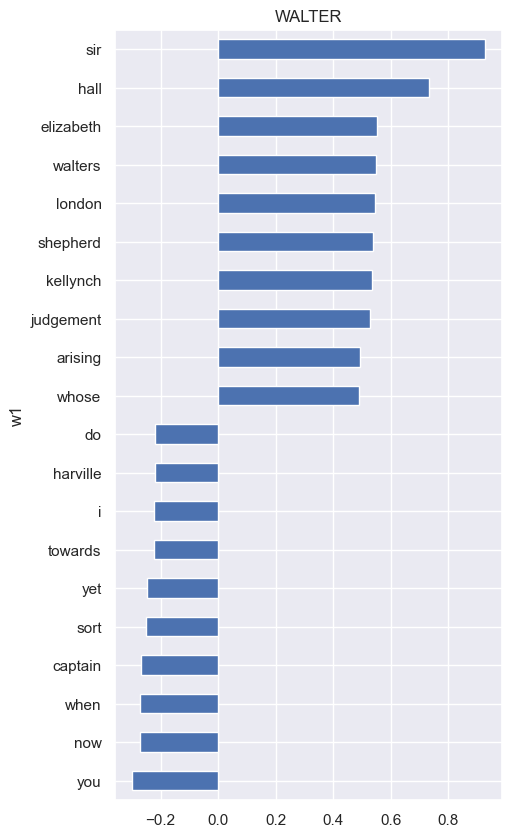

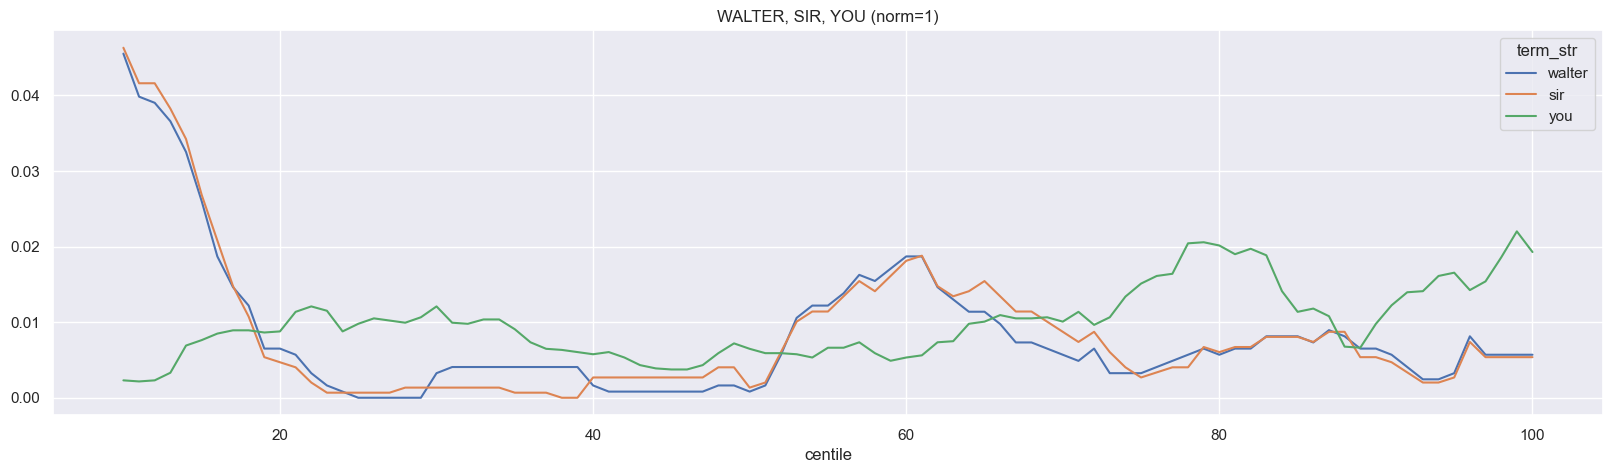

In [53]:
corr_words(Q1, 'walter')

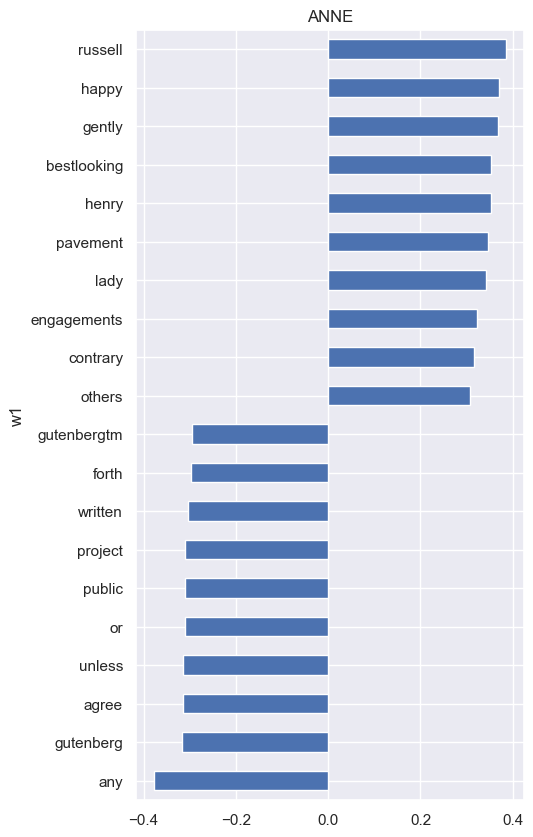

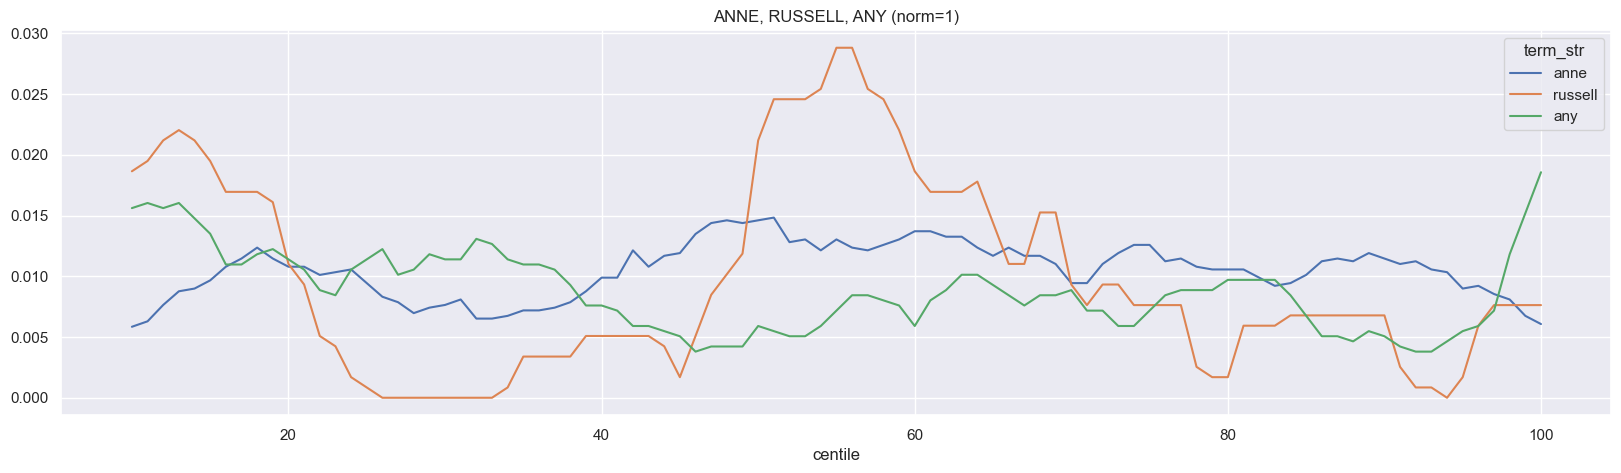

In [54]:
corr_words(Q1, 'anne')

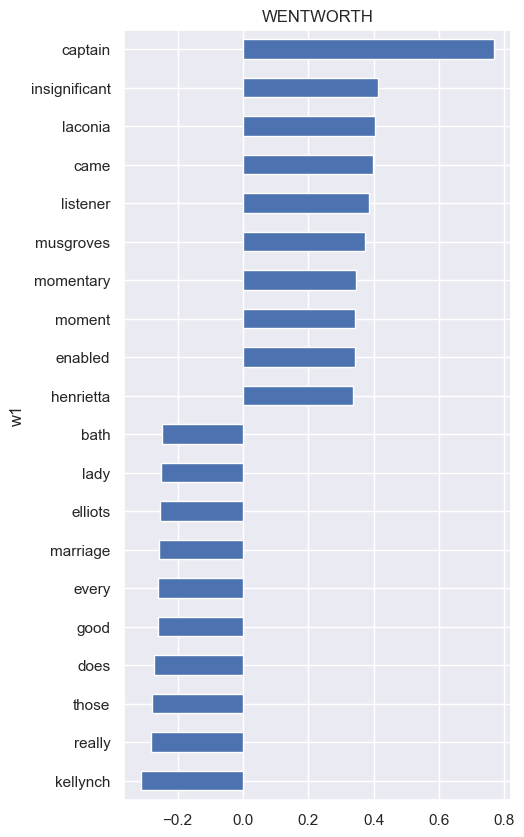

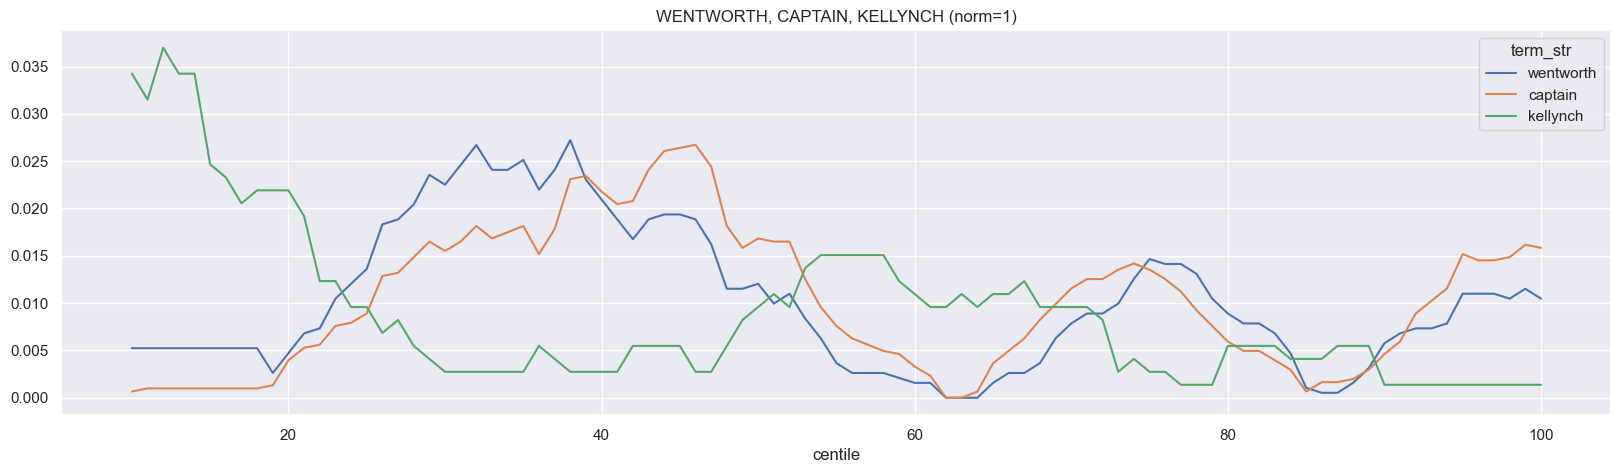

In [301]:
corr_words(Q1, 'wentworth')

## Play

In [307]:
Q2 = correlated_word_pairs(M[1], V[V.dfidf > .5].index)

In [308]:
Q2

,,c
w0,w1,
friend,house,-0.328923
house,friend,-0.328923
few,friend,-0.313483
friend,few,-0.313483
moment,known,-0.311135
...,...,...
kellynch,sir,0.572819
charles,henrietta,0.627372
henrietta,charles,0.627372


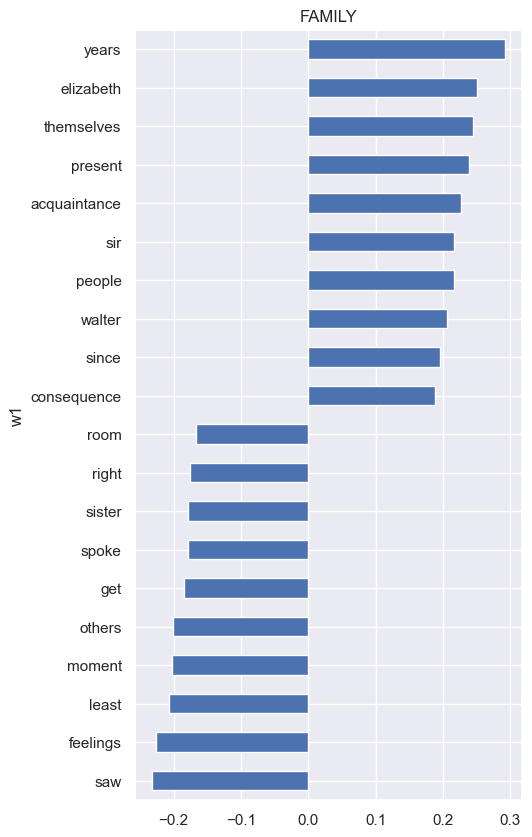

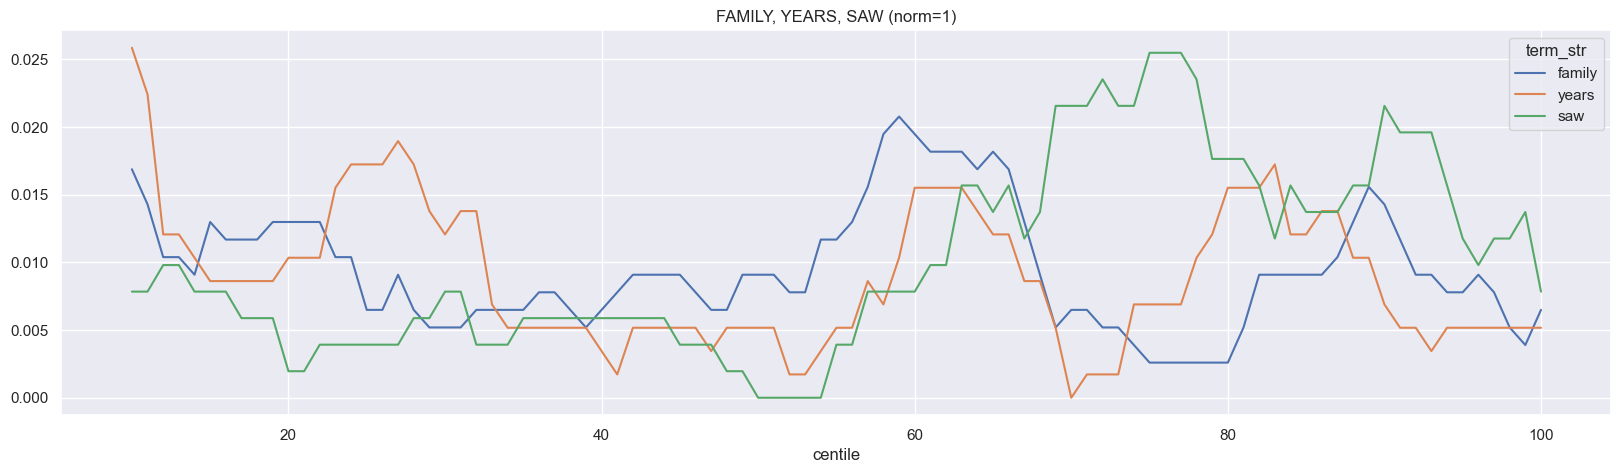

In [316]:
corr_words(Q2, 'family')